## import the data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
cal= pd.read_csv("/home/jovyan/MonDossier/machine learning/ML tentative summer/cal_housing.data", header = None )
cal.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [63]:
cal.rename(columns={0: 'longitude',1: 'latitude',2: 'housingMedianAge',3: 'totalRooms',
                         4:'totalBedrooms',5: 'population',6: 'households',7:'medianIncome',8:'medianHouseValue'}, inplace = True)

In [64]:
cal.head(5)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [65]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [66]:
cal.rename(columns={'medianHouseValue': 'Price'}, inplace = True)

## Checking outliers and skewness to respect the assumptions of linearity 

In [67]:
cal.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


checking the std helps detect outliers before visualization : 
so mathematically speaking if a  data point is more than 3 standard deviations away from the mean, it might be considered an outlier.
This method assumes the data is roughly normally distributed (bell-shaped).

If your feature is highly skewed, the mean and std won't reflect the true spread well — so this method may miss or wrongly identify outliers.

## IQR for Price

In [68]:
from scipy.stats import iqr
import numpy as np

prices = cal["Price"]
iqr_value = iqr(prices, rng=(25, 75), interpolation='midpoint')  # or method='midpoint' in newer versions

Q1 = np.percentile(prices, 25, interpolation='midpoint')
Q3 = np.percentile(prices, 75, interpolation='midpoint')

lower = Q1 - 1.5 * iqr_value
upper = Q3 + 1.5 * iqr_value

outliers = prices[(prices < lower) | (prices > upper)]


outliers.unique()



array([500001., 483300., 489600., 494000., 499000., 485400., 483500.,
       483100., 495500., 490800., 495600., 483800., 497600., 498700.,
       486900., 486400., 485000., 500000., 494700., 485100., 489800.,
       498400., 497400., 491200., 486800., 484700., 483700., 490400.,
       493200., 498600., 490300., 492200., 483600., 488500., 487500.,
       493400., 485700., 492500., 487800., 489000., 493800., 495800.,
       487100., 484100., 495400., 487000., 499100., 493000., 482900.,
       484600., 487200., 493300., 496400., 488900., 482700., 485300.,
       494400., 492300., 492900., 490000., 495900., 496000., 498800.,
       492000.])

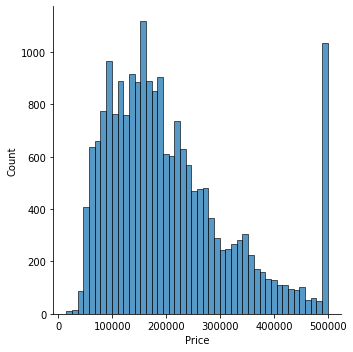

In [69]:
sns.displot(cal["Price"])

The values are mostly on the higher end, so your outliers are likely high-priced listings.
There's no extremely low value like 10 or 100 — suggesting no lower-end outliers, or perhaps the dataset is skewed toward higher prices.

## Skewness of the DATA

Skewness Value	Interpretation
Around 0	Distribution is fairly symmetric

Between -0.5 and 0.5	Approximately normal distribution (slight skew is okay)

Between -1 and -0.5 or 0.5 and 1	Moderate skewness (data is somewhat asymmetric)

Less than -1 or greater than 1	High skewness (strongly asymmetric distribution)


In [70]:
skewness = cal.skew()
skewness.sort_values()

longitude          -0.297801
housingMedianAge    0.060331
latitude            0.465953
Price               0.977763
medianIncome        1.646657
households          3.410438
totalBedrooms       3.453073
totalRooms          4.147343
population          4.935858
dtype: float64

## Features

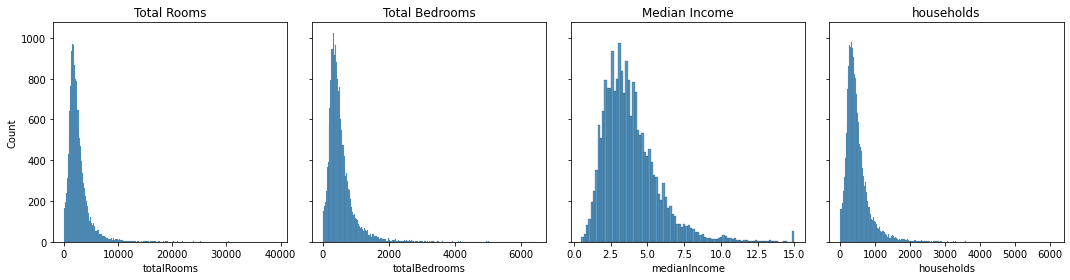

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))

sns.histplot(cal["totalRooms"], ax=ax1, kde=False)
ax1.set_title("Total Rooms")

sns.histplot(cal["totalBedrooms"], ax=ax2, kde=False)
ax2.set_title("Total Bedrooms")

sns.histplot(cal["medianIncome"], ax=ax3, kde=False)
ax3.set_title("Median Income")

sns.histplot(cal["households"], ax=ax4, kde=False)
ax4.set_title("households")


plt.tight_layout()
plt.show()


most od the features are skewed toward high values just like the price 

## Correcting the skewness and deleting Outliers

## Price

### quantile 0.99

In [72]:
q = cal["Price"].quantile(0.99) #finds the highest price higher than 99% of all the prices 
df_new= cal[cal["Price"]<q] # keeps only the houses with prices less than that 
#Basically, it removes the top 1% most expensive houses from your data.

In [73]:
df_new.skew()

longitude          -0.290800
latitude            0.456468
housingMedianAge    0.069543
totalRooms          4.227207
totalBedrooms       3.451457
population          4.961349
households          3.408451
medianIncome        0.913123
Price               0.809572
dtype: float64

### Log price

In [74]:
log_price= np.log(df_new["Price"])
df_new["log_price"] = log_price


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


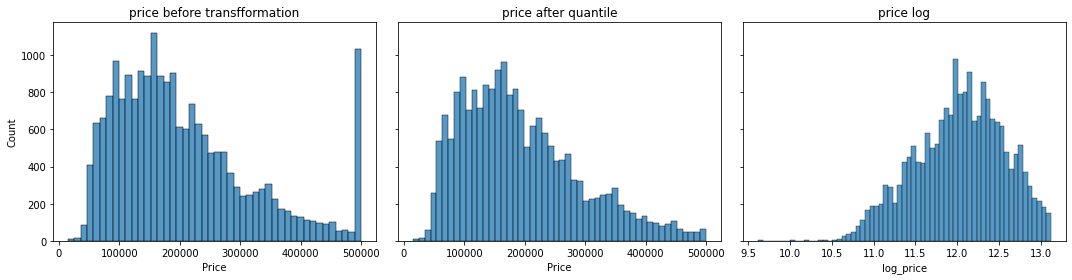

In [75]:

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

sns.histplot(cal["Price"], ax=ax1, kde=False)
ax1.set_title("price before transfformation")

sns.histplot(df_new["Price"], ax=ax2, kde=False)
ax2.set_title("price after quantile")

sns.histplot(df_new["log_price"], ax=ax3, kde=False)
ax3.set_title("price log")

plt.tight_layout()
plt.show()

## MedianIncome

In [76]:
q_income = df_new["medianIncome"].quantile(0.99)
df_new_1= df_new[df_new["medianIncome"]<q_income]

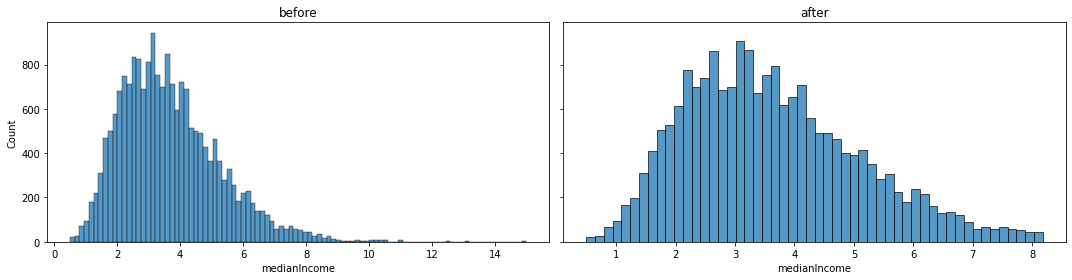

In [77]:


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

sns.histplot(df_new["medianIncome"], ax=ax1, kde=False)
ax1.set_title("before")

sns.histplot(df_new_1["medianIncome"], ax=ax2, kde=False)
ax2.set_title("after")

plt.tight_layout()
plt.show()

## Total bedrooms

In [78]:
q_bedrooms= df_new_1["totalBedrooms"].quantile(0.98)
df_new_2= df_new_1[df_new_1["totalBedrooms"]<q_bedrooms]

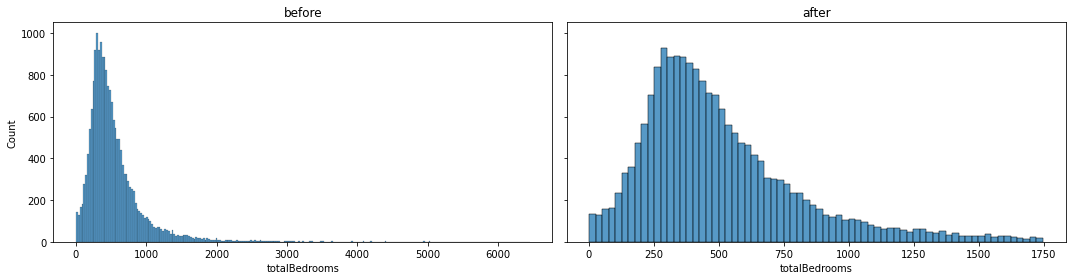

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

sns.histplot(df_new_1["totalBedrooms"], ax=ax1, kde=False)
ax1.set_title("before")

sns.histplot(df_new_2["totalBedrooms"], ax=ax2, kde=False)
ax2.set_title("after")

plt.tight_layout()
plt.show()

## totalRooms

In [80]:
q_rooms= df_new_2["totalRooms"].quantile(0.98)
df_new_3= df_new_2[df_new_2["totalRooms"]<q_rooms]

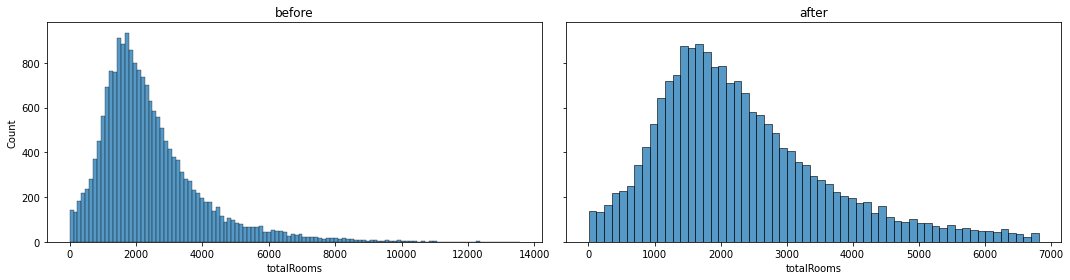

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

sns.histplot(df_new_2["totalRooms"], ax=ax1, kde=False)
ax1.set_title("before")

sns.histplot(df_new_3["totalRooms"], ax=ax2, kde=False)
ax2.set_title("after")



plt.tight_layout()
plt.show()

## households

In [82]:
q_household= df_new_3["households"].quantile(0.98)
df_new_4 = df_new_3[df_new_3["households"]<q_household]

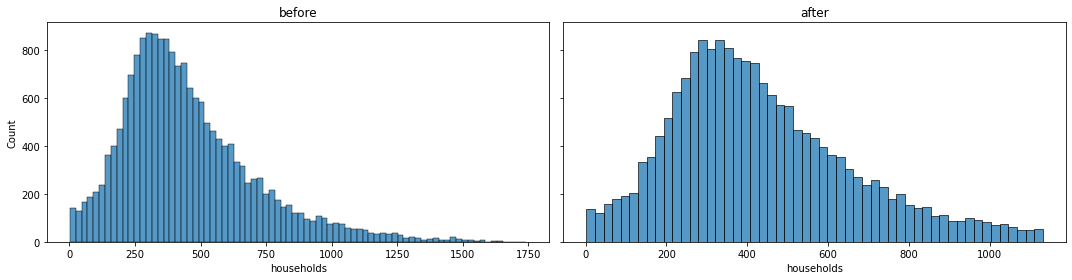

In [83]:


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

sns.histplot(df_new_3["households"], ax=ax1, kde=False)
ax1.set_title("before")

sns.histplot(df_new_4["households"], ax=ax2, kde=False)
ax2.set_title("after")

plt.tight_layout()
plt.show()



In [84]:
df_new_4.drop(columns= "Price", inplace = True) 

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Result after using quantile

In [85]:
df_new_4.skew()

longitude          -0.280696
latitude            0.443950
housingMedianAge    0.028338
totalRooms          0.900323
totalBedrooms       0.808042
population          1.242668
households          0.721871
medianIncome        0.595525
log_price          -0.284927
dtype: float64

| Feature          | Skewness | Interpretation      | Suggested Action                              |
| ---------------- | -------- | ------------------- | --------------------------------------------- |
| population   | 1.24 | Strong right skew   |Log |
| totalRooms       | 0.90     | Moderate right skew |log              |
| totalBedrooms    | 0.81     | Moderate right skew |log         |
| households       | 0.72     | Moderate right skew |Log              |
| medianIncome     | 0.60     | Slight right skew   |Log           |
| latitude         | 0.44     | Low skew            |ok                         |
| housingMedianAge | 0.03     | Very low skew       |ok
| longitude    | -0.28    | Mild left skew      |ok                                  |
| log\_price   | -0.28    | Mild left skew      | ✅ Already transformed                |


## SQRT


In [86]:
df_new_4["totalBedrooms"]=np.sqrt(df_new_4["totalBedrooms"])
df_new_4["totalRooms"]=np.sqrt(df_new_4["totalRooms"])
df_new_4["population"]=np.sqrt(df_new_4["population"])
df_new_4["households"]=np.sqrt(df_new_4["households"])
df_new_4["medianIncome"]=np.sqrt(df_new_4["medianIncome"])


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

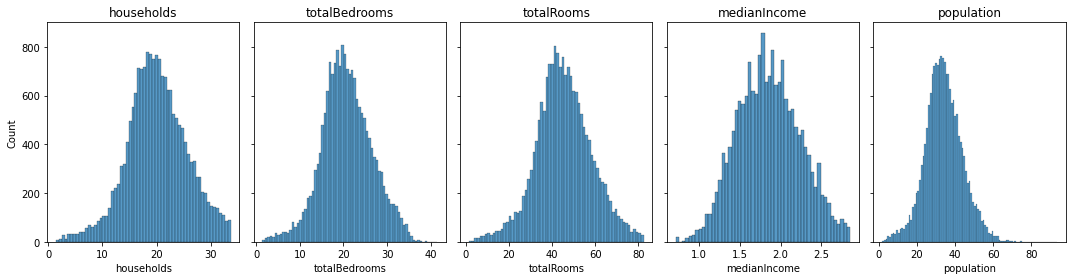

In [87]:


fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(15, 4))


sns.histplot(df_new_4["households"], ax=ax1, kde=False)
ax1.set_title("households")

sns.histplot(df_new_4["totalBedrooms"], ax=ax2, kde=False)
ax2.set_title("totalBedrooms")

sns.histplot(df_new_4["totalRooms"], ax=ax3, kde=False)
ax3.set_title("totalRooms")

sns.histplot(df_new_4["medianIncome"], ax=ax4, kde=False)
ax4.set_title("medianIncome")

sns.histplot(df_new_4["population"], ax=ax5, kde=False)
ax5.set_title("population")


plt.tight_layout()
plt.show()


df_new_4["log_population"] = np.log1p(df_new_4["population"])
df_new_4["log_totalRooms"] = np.log1p(df_new_4["totalRooms"])
df_new_4["log_totalBedrooms"] = np.log1p(df_new_4["totalBedrooms"])
df_new_4["log_households"] = np.log1p(df_new_4["households"])

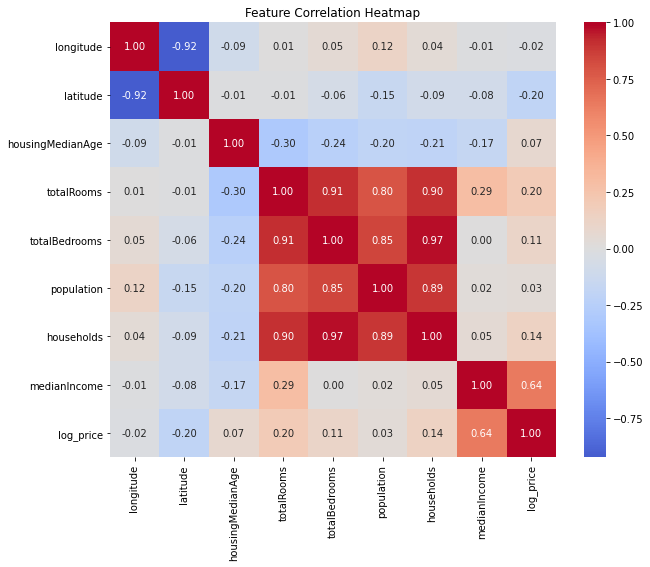

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = df_new_4.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title("Feature Correlation Heatmap")
plt.show()

In [89]:
abs(corr["log_price"]).sort_values(ascending = False)

log_price           1.000000
medianIncome        0.644481
latitude            0.200033
totalRooms          0.199354
households          0.138125
totalBedrooms       0.106059
housingMedianAge    0.072160
population          0.032113
longitude           0.017880
Name: log_price, dtype: float64

the feature with the highest correlation with the price is Median income, we are going to focus our regression on this variable and then see if we should add new ones

## Linear reg using statmodels with one feature

In [90]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# x = variable explicative (DataFrame 2D)
X = df_new_4[["medianIncome"]]
# y = variable cible
y = df_new_4["log_price"]

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Ajout de la constante (intercept) à x_train
x_train_const = sm.add_constant(x_train)

# Modèle OLS
results = sm.OLS(y_train, x_train_const).fit()

# Résumé
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:16:18   Log-Likelihood:                -7600.0
No. Observations:               14664   AIC:                         1.520e+04
Df Residuals:                   14662   BIC:                         1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.3664      0.016    632.945      0.000      10.334      10.399
medianIncome     0.8892      0.009    102.971      0.000       0.872       0.906
==============================================================================
Omnibus:                      113.188   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.733
Skew:                           0.150   Prob(JB):                     3.36e-30
Kurtosis:                       3.364   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

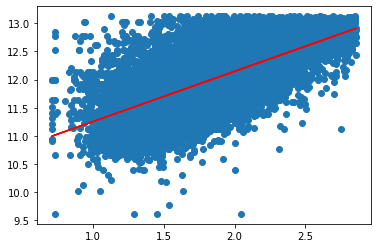

In [91]:
median= df_new_4[["medianIncome"]]
price = df_new_4["log_price"]
reg = 0.8892*median + 10.3664
fig = plt.plot(median,reg, c ="r")

plt.scatter( median,price)

plt.show()

- 42% of price variation is explained. Moderate fit.
- A 1 unit increase in median income increases log_price by 0.8892. This is large and positive.

## Linear reg using statmodels with two features

In [92]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# x = variable explicative (DataFrame 2D)
X = df_new_4[["medianIncome","latitude"]]
# y = variable cible
y = df_new_4["log_price"]

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Ajout de la constante (intercept) à x_train
x_train_const = sm.add_constant(x_train)

# Modèle OLS
results = sm.OLS(y_train, x_train_const).fit()

# Résumé
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     5784.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:16:21   Log-Likelihood:                -7325.1
No. Observations:               14664   AIC:                         1.466e+04
Df Residuals:                   14661   BIC:                         1.468e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.6901      0.058    200.862      0.000      11.576      11.804
medianIncome     0.8731      0.009    102.689      0.000       0.856       0.890
latitude        -0.0363      0.002    -23.664      0.000      -0.039      -0.033
==============================================================================
Omnibus:                      175.307   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.975
Skew:                           0.196   Prob(JB):                     1.26e-47
Kurtosis:                       3.448   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear reg using statmodels with multiple features

In [93]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# x = variable explicative (DataFrame 2D)
X = df_new_4[["medianIncome","latitude","households","totalRooms","totalBedrooms"]]
# y = variable cible
y = df_new_4["log_price"]

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Ajout de la constante (intercept) à x_train
x_train_const = sm.add_constant(x_train)

# Modèle OLS
results = sm.OLS(y_train, x_train_const).fit()

# Résumé
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3062.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:16:22   Log-Likelihood:                -6346.6
No. Observations:               14664   AIC:                         1.271e+04
Df Residuals:                   14658   BIC:                         1.275e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.3318      0.062    166.151      0.000      10.210      10.454
medianIncome      1.2157      0.011    106.284      0.000       1.193       1.238
latitude         -0.0186      0.001    -12.502      0.000      -0.022      -0.016
households        0.0158      0.002      6.758      0.000       0.011       0.020
totalRooms       -0.0365      0.001    -42.835      0.000      -0.038      -0.035
totalBedrooms     0.0692      0.003     25.171      0.000       0.064       0.075
==============================================================================
Omnibus:                      322.936   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.574
Skew:                           0.187   Prob(JB):                    1.14e-122
Kurtosis:                       3.883   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

multicolinearity in my model , probably between "households","totalRooms","totalBedrooms". the coef for total Rooms should be positive , because a price of house should go up as the number of rooms increased 

In [94]:
x_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif_values = []
vif["variable"] = x_vif.columns

for i in range(x_vif.shape[1]):  # <-- ici shape[1] (colonnes) !
    vif_i = variance_inflation_factor(x_vif.values, i)
    vif_values.append(vif_i)

vif["VIF"] = vif_values

print(vif)


        variable         VIF
0          const  407.094065
1   medianIncome    2.062983
2       latitude    1.085915
3     households   17.856744
4     totalRooms   12.685197
5  totalBedrooms   26.363860


In [95]:
corr_matrix = df_new_4[['households', 'totalRooms', 'totalBedrooms']].corr()
print(corr_matrix)



               households  totalRooms  totalBedrooms
households       1.000000    0.902756       0.970279
totalRooms       0.902756    1.000000       0.914291
totalBedrooms    0.970279    0.914291       1.000000


In [96]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# x = variable explicative (DataFrame 2D)
X = df_new_4[["medianIncome","latitude","households"]]
# y = variable cible
y = df_new_4["log_price"]

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Ajout de la constante (intercept) à x_train
x_train_const = sm.add_constant(x_train)

# Modèle OLS
results = sm.OLS(y_train, x_train_const).fit()

# Résumé
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     3992.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:16:27   Log-Likelihood:                -7211.4
No. Observations:               14664   AIC:                         1.443e+04
Df Residuals:                   14660   BIC:                         1.446e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4544      0.060    191.506      0.000      11.337      11.572
medianIncome     0.8678      0.008    102.770      0.000       0.851       0.884
latitude        -0.0345      0.002    -22.585      0.000      -0.037      -0.031
households       0.0090      0.001     15.140      0.000       0.008       0.010
==============================================================================
Omnibus:                      203.462   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.778
Skew:                           0.229   Prob(JB):                     3.15e-53
Kurtosis:                       3.431   Cond. No.                         753.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

✅ Improvement in R² and AIC: The inclusion of latitude and household improved both the R-squared (from 0.420 to 0.45) and AIC (from ~15200 to ~14430)

📉 Negative Latitude Coefficient: The negative coefficient for latitude suggests that properties in more northern locations (higher latitudes) tend to have lower log-prices — a reasonable result if prices are higher in southern, more desirable regions (like coastal areas).

🌟 All Variables Are Statistically Significant: they  have very small p-values, meaning they significantly contribute to predicting log_price.

## Reg on testing Set

In [98]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# x = variable explicative (DataFrame 2D)
X = df_new_4[["medianIncome","latitude","households"]]
# y = variable cible
y = df_new_4["log_price"]

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Ajout de la constante (intercept) à x_train
x_test_const = sm.add_constant(x_test)

# Modèle OLS
results = sm.OLS(y_test, x_test_const).fit()

# Résumé
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     936.0
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:19:32   Log-Likelihood:                -1820.1
No. Observations:                3667   AIC:                             3648.
Df Residuals:                    3663   BIC:                             3673.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4564      0.121     94.835      0.000      11.220      11.693
medianIncome     0.8538      0.017     49.081      0.000       0.820       0.888
latitude        -0.0348      0.003    -11.406      0.000      -0.041      -0.029
households       0.0107      0.001      9.033      0.000       0.008       0.013
==============================================================================
Omnibus:                       53.685   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.949
Skew:                           0.133   Prob(JB):                     3.58e-19
Kurtosis:                       3.697   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""